iteration: 0. Error: 0.49924700687533047
iteration: 1000. Error: 0.009639191960696195
iteration: 2000. Error: 0.0036685472024100057
iteration: 3000. Error: 0.002212656270914021
iteration: 4000. Error: 0.0015707031391293301
iteration: 5000. Error: 0.0012123203559926783
iteration: 6000. Error: 0.0009846159249514977
iteration: 7000. Error: 0.0008275576070151486
iteration: 8000. Error: 0.0007128875941981153
iteration: 9000. Error: 0.0006255963016758296
iteration: 10000. Error: 0.0005569884043164658
iteration: 11000. Error: 0.0005016853645032955
iteration: 12000. Error: 0.0004561850430968448
iteration: 13000. Error: 0.0004181108657145229
iteration: 14000. Error: 0.0003857942723048765
Training complete
Precentages: 
[[9.99613826e-01]
 [9.99613418e-01]
 [1.66212501e-04]
 [4.93151116e-04]]
Predictions: 
[[1.]
 [1.]
 [0.]
 [0.]]


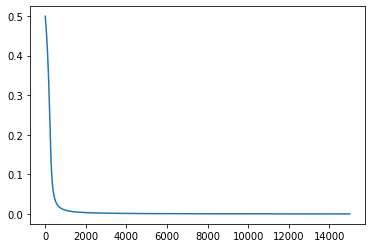

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1,1,0],[1,0,1],[1,0,0],[1,1,1]])
y = np.array([[1],[1],[0],[0]])

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_deriv(x):
  return sigmoid(x)*(1-sigmoid(x))

def forward(x,w1,w2,predict=False):
  a1 = np.matmul(x,w1)
  z1 = sigmoid(a1)
  bias = np.ones((len(z1),1))
  z1 = np.concatenate((bias,z1),axis=1)
  a2 = np.matmul(z1,w2)
  z2 = sigmoid(a2)
  if predict:
    return z2
  return a1,z1,a2,z2

def backprop(a2,z0,z1,z2,y):
  delta2 = z2 - y
  Delta2 = np.matmul(z1.T,delta2)
  delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_deriv(a1)
  Delta1 = np.matmul(z0.T,delta1)
  return delta2,Delta1,Delta2

w1 = np.random.randn(3,5)
w2 = np.random.randn(6,1)

lr = 0.89
costs = []

epochs = 15000
m = len(X)
for i in range(epochs):
  a1,z1,a2,z2 = forward(X,w1,w2)
  delta2,Delta1,Delta2 = backprop(a2,X,z1,z2,y)
  w1 -= lr*(1/m)*Delta1
  w2 -= lr*(1/m)*Delta2
  c = np.mean(np.abs(delta2))
  costs.append(c)
  if i % 1000 == 0:
    print(f"iteration: {i}. Error: {c}")
print("Training complete")

z3 = forward(X,w1,w2,True)
print("Precentages: ")
print(z3)
print("Predictions: ")
print(np.round(z3))
plt.plot(costs)
plt.show()
